<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/AM2021_Calculus_p1_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Calculus - Session 1
I den første del af kurset lærte vi om lineær algebra. For at få yderligere forståelse for de underliggende matematiske koncepter, er vi nødt til at bruge lidt tid på at forstå hovedideerne fra **calculus**, eller infinitesimalregning, som er den samlede betegnelse for differential- og integralregning.

De 3 sessioner i dette kursus er, lige som linkeær algebra har været, for det meste en opfriskning af matematik som I burde have set før på B nievau.

#### Del 1.1
Calculus giver en ramme for at forstå mekanikken af matematiske funktioner. Calculus hjælper os med at:
* Forstå hældning i forskellige punkter
* Finde ekstreme punkter i en funktion
* Bestemme den optimale funktion, der bedst repræsenterer et datasæt (link til statistik / data science)

Vi starter med et lille eksempel fra beskrivende statistik (eksamen) for at vise hvor calculus giver os en base for at arbejde videre med kvantitative metoder på 3. semester og bagefter.

In [ ]:
# pakker importeres
import pandas as pd
import seaborn as sns
sns.set()

In [ ]:
# Indlæs data
df = pd.read_csv('https://sds-aau.github.io/IntroStat/Data/airbnb.csv.gz', compression='gzip')

# Udsmid manglende værdier i variable hvor der mangler op til og med 103 observationer 
# dvs. variable med flere manglende observationer end 103 skal ikke renses for manglende observationer

df.dropna(subset=['name', 'bathrooms', 'bedrooms', 'beds'], inplace=True)

# Her omdannes "price" til en float (numerisk variabel) og får fjernet "$" og "," - det har vi gjort for jer.
df.price = df.price.replace('[\$,]', '', regex=True).astype(float)

# Med udgangspunkt i "price", beskær datasættet til 95. percentil (95 inkl.)
df = df[df.price <= df.price.quantile(.95)]

# filrer data, således der kun beholdes observationer af de 3 hyppigste kategorier
# her bruger vi "isin" komando for at definere tilladte kategorier

df = df[df.property_type.isin(['Apartment', 'Condominium', 'House'])]

# fortag den samme filtrering for "room_type", hvor der kun beholdes de 2 hyppigste kategorier
df = df[df.room_type.isin(['Entire home/apt', 'Private room'])]

# Ligesom med price variablen, skal "cleaning_fee" også have fjernet "$" og ",", og gøres til en float (numerisk variabel) 
df.cleaning_fee = df.cleaning_fee.replace('[\$,]', '', regex=True).astype(float)

# Udfyld manglende observationer i cleaning fee med 0

df.cleaning_fee.fillna(0, inplace=True)

# Lav en ny variabel "total_price" ud fra "price" og "cleaning_fee" (sammenlæg de to værdier fra )
df['total_price'] = df.price + df.cleaning_fee

# definer en dataframe hvor der kun medtages observationer med > 10 reviews "number_of_reviews"
# samlign korrelationer mellem total_price/price vs accomodates
# fortolk de to korrelationskoefficienter


df = df[df.number_of_reviews > 10]

In [ ]:
df

,id,name,host_id,host_name,host_since,host_location,host_acceptance_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month,total_price
0,6983,Copenhagen 'N Livin',16774,Simon,2009-05-12,"Copenhagen, Capital Region of Denmark, Denmark",33%,f,1.0,"Copenhagen, Hovedstaden, Denmark",Nørrebro,Nrrebro,Copenhagen,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",97.0,365.0,$0.00,33.0,2,15,168,96.0,moderate,1,1.28,398.0
3,29118,Best Location in Cool Istedgade,125230,Nana,2010-05-15,"Copenhagen, Capital Region of Denmark, Denmark",17%,f,1.0,"Copenhagen, Hovedstaden, Denmark",Vesterbro,Vesterbro-Kongens Enghave,Copenhagen,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Paid parking off premises"",Heat...",NaN,797.0,NaN,300.0,7,14,22,98.0,strict_14_with_grace_period,1,0.18,1097.0
4,29618,Artsy and familyfriendly home in lovely Copenh...,127577,Simon And Anna,2010-05-18,"Copenhagen, Capital Region of Denmark, Denmark",NaN,f,1.0,"Copenhagen, Hovedstaden, Denmark",Østerbro,sterbro,Copenhagen,Apartment,Entire home/apt,4,1.0,3.0,3.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",NaN,857.0,NaN,75.0,7,31,90,94.0,moderate,1,0.75,932.0
5,31094,"Very central and cozy, new kitchen",129976,Ebbe,2010-05-22,"Copenhagen, Capital Region of Denmark, Denmark",NaN,f,1.0,"Copenhagen, Capital Region of Denmark, Denmark",Vesterbro,Vesterbro-Kongens Enghave,Copenhagen,Apartment,Entire home/apt,3,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",689.0,751.0,"$1,000.00",0.0,2,10,17,97.0,strict_14_with_grace_period,1,0.14,751.0
6,32379,120 m2 artist flat on Vesterbro,140105,Lise,2010-06-07,"Copenhagen, Capital Region of Denmark, Denmark",97%,f,3.0,"Copenhagen, Hovedstaden, Denmark",Vesterbro,Vesterbro-Kongens Enghave,Copenhagen,Apartment,Entire home/apt,3,2.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,930.0,$0.00,0.0,3,365,73,98.0,moderate,1,0.61,930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26972,41056781,Skøn ny lejlighed med to altaner,231002568,Allan,2018-12-16,"Copenhagen, Denmark",100%,f,1.0,"Copenhagen, Denmark",Amager Vest,Amager Vest,København,Condominium,Entire home/apt,3,1.0,2.0,3.0,Real Bed,"{Kitchen,""Free parking on premises"",Elevator,H...",NaN,498.0,NaN,0.0,1,30,13,83.0,flexible,1,2.71,498.0
27057,41260940,Nice room 2 minutes to Metro station,1740731,Anja,2012-02-12,"Lunsen, Uppsala län, Sweden",100%,f,3.0,"Copenhagen, Denmark",Vesterbro,Vesterbro-Kongens Enghave,København,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Paid parking off premises...",NaN,551.0,NaN,0.0,1,1125,13,94.0,moderate,1,2.24,551.0
27181,41513485,Central clean city apartment in quiet area,82430368,Sassia,2016-07-08,"Copenhagen, Denmark",96%,f,3.0,"Copenhagen, Denmark",Amager,Amager st,København,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Essentials,""Hair drye...",NaN,598.0,$0.00,100.0,1,1125,18,89.0,strict_14_with_grace_period,3,3.31,698.0
27349,41810588,"Close to city, airport and beach! Free parking!",22235426,Matteo,2014-10-07,"Copenhagen, Denmark",84%,f,0.0,"Copenhagen, Denmark",Amagerbro,Amager st,København,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",NaN,751.0,$0.00,0.0,1,1125,11,98.0,flexible,2,2.26,751.0


In [ ]:
# korrelation (fra eksamen)

df.bedrooms.corr(df.cleaning_fee)

0.3436536574458501

In [ ]:
df.bedrooms.corr(df.total_price)

0.5114951369328756

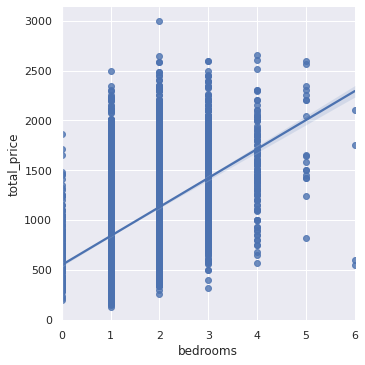

In [ ]:
# vi kan bruge seaborn til at plotte alle vores observationer og en "trendline"

sns.lmplot(x="bedrooms", y="total_price", data=df)

In [ ]:
# Vi kan bruge OLS (lineær regression) til at finde den linkeære funtion der best beskriver vores data (vi lærer hvordan det fungerer på 3. semester)

import statsmodels.api as sm

X = sm.add_constant(df.bedrooms)

model = sm.OLS(df.total_price, X)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:            total_price   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     3030.
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        07:24:58   Log-Likelihood:                -62678.
No. Observations:                8553   AIC:                         1.254e+05
Df Residuals:                    8551   BIC:                         1.254e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        548.1718      8.465     64.758      0.0

Vi kan se, at vores data kan best beskrives med den lineære funktion $\text{total_price} = 548.17 + 291.17*\text{bedrooms}$. Dvs vi betaler 548.17kr/nat lige meget hvad og hver gang der er 1 soveværelse mere i en AirBnb lejlighed kan vi forvente, at prisen stiger med 291.17kr/nat. Det er selfvølglig kun noget gennemsnitligt. Man kan også godt se i vores plot, at reele priser afviger en del.

Som sagt, skal vi ikke snakke meget mere om statistik og økonometri her - det kommer på 3. semester. Det, som vi skal have styr på er selve funktioner...

Vi starter med at oprette et gennemgående problem, som vi hele tiden henviser til i dette afsnit. Problemet er ikke et økonomisk, så vi kan fokusere på matematikken for nu. Lad os antage, at vi får følgende ligning, som beskriver banens bane, efter at den er sparket af en fodboldspiller:

$y = (-x^2) + 3x -1$

$x$ er tid i sekunder, mens $y$ er boldens vertikale position. Naturligvis vil vi gerne kende den højeste position, bolden nåede, og hvornår det skete. Vi kan tegne ligningen og estimere resultatet visuelt, men hvis vi ønsker det præcise tidspunkt og vertikale position skal vi bruge calculus. I dette kursus undersøger vi de forskellige beregningskoncepter, der er nødvendige for at bygge op til at være i stand til at finde dette punkt.

Lad os starte med at visualisere denne funktion.



**Øvelse**

* Brug numpy.linspace() til at generere en Numpy array indeholdene **100** værdier fra **0** til **3** og tildel til $x$.
* Transformer $x$ ved at anvende funktionen: $y = (-x^2) + 3x -1$. Tildel resultatet til $y$
* Brug pyplot.plot() til at generere et linjediagram med $x$ på x-aksen og $y$ på y-aksen.
* Overvej, hvordan man kan udregne max højden, og det præcise tidspunkt det skete. 

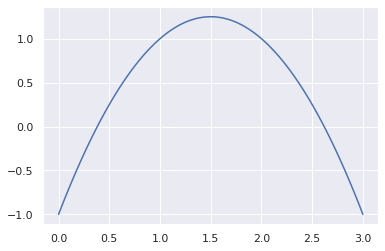

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3, num=100)
y = -(x**2)+3*x-1

plt.plot(x,y)

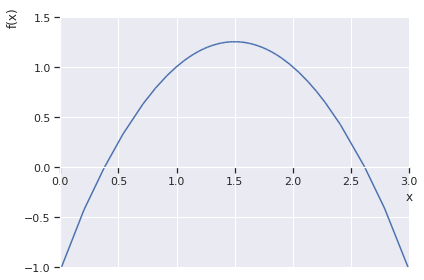

In [ ]:
# alternativ...

from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(-(x**2)+3*x-1, xlim=[0,3], ylim=[-1,1.5], show=True)

#### Del 1.2
Før vi dykker ned i at analysere kurven for en bolds højde, skal vi forstå nogle få centrale koncepter først. Vi vil udforske disse koncepter ved hjælp af enkle, lige linjer først og derefter opbygge at anvende disse begreber på kurver. En enkel, lige linje defineres tydeligere som en lineær funktion. Alle lineære funktioner kan skrives i følgende form:

$y = mx + b$

For en bestemt lineær funktion, m og b er konstante værdier, mens $x$ og $y$ er variabler. $y = 3x + 1$ og $y = 5$ er begge eksempler på lineære funktioner.

Lad os fokusere på funktionen $y = 3x + 1$ indtil videre. Denne funktion multiplicerer enhver $x$ værdi, vi tilføjer med 3 og forhøjer derefter værdien med 1. 

Lad os starte med at få en geometrisk forståelse af lineære funktioner. Nedenfor finder du et billede, der kan hjælpe dig med at forstå, hvordan linjen forskydes eller ændres, når du ændrer værdier på $m$ og/eller $b$.
* Hvordan ændres linjen, når du holder $m$ fast, men varierer $b$?
* Hvordan ændres linjen, når du holder $b$ fast, men varierer $m$?
*	Hvilken værdi styrer linjens stejlhed?
*	Hvad sker der med linjen, når $m$ er indstillet til 0?

In [ ]:
x = np.linspace(-5,6,10)
x = np.array([int(i) for i in x])
print(x)

[-5 -3 -2 -1  0  1  2  3  4  6]


In [ ]:
y = 3*x + 1
print(y)

[-14  -8  -5  -2   1   4   7  10  13  19]


In [ ]:
import IPython

In [ ]:
iframe = '<iframe src="https://www.desmos.com/calculator/efglhmyz8f" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)

#### Del 1.3
Fra det forrige trin kan vi fortælle, at konstanten $m$ bestemmer, hvor *stejl* linjen er.
Når m er lig med 0, er linjen helt flad og er parallel med x-aksen. Når $m$ og $b$ begge er indstillet til 0, svarer linjen til x-aksen.

$m$-værdien styrer en linjes hældning, mens $b$-værdien styrer en linjens y-skæring. Disse udtryk vil blive uddybet yderligere. Y-skæringspunktet er den værdi, hvor linjen skærer y-aksen. Når man fastholder $m$, men varierede b, har du muligvis bemærket, at det punkt, hvor linjen krydsede y-aksen, varierede. Linjen skærer y-aksen når $x$ er 0. For $y = 3x$, er y-skæringspunktet:

$f(0) = 3(0) + 1 = 1$

Mens y-skæringspunktet beskriver, hvor en linje skærer y-aksen, beskriver hældningen linjens stejlhed. I det sidste trin, når vi indstiller $m$ til en positiv værdi, er y-værdierne steget efterhånden som x-værdierne steg. Når vi indstiller $m$ til en negativ værdi, falder y-værdierne, som x-værdierne steg. Når $m$ var 0, var y-værdien konsistent (og tilsvarende y-skæringspunktet). 


En anden måde at tænke på hældning er **ændringshastighed** (*rate of change*). Ændringshastigheden er, hvor meget y-aksen ændrer sig, for en bestemt ændring i x-aksen.

$m = \frac{\text{change in y}}{\text{change in x}} = \frac{\Delta y}{\Delta x}$

Her er hældningsberegningen mellem punkterne (1,4) og (4,14), som begge er punkter på linjen $y = 3x + 1$:

$m = \frac{\text{change in y}}{\text{change in x}} = \frac{13-4}{4-1} = 3$

Når der skal skrives unikke $x$ og $y$ koordinater, tilføjes der normalt en tal intex (subscript). For eksempel kan punkterne (1,4) og (4,13) fra den sidste beregning være kaldt ($x_1, y_1$) og ($x_2, y_2$). Hvis vi ikke specificerer hvad ($x_1, y_1$) og ($x_2, y_2$) er, handler de som variabler. Vi understreger dette yderligere i billedet til dette trin, og når vi undersøger i beregningerne i næste trin.

Det følgende billede indeholder en visualisering af $y = 3x + 1$ med 2 koordinater fremhævet. Prøv at variere $x_1$ og $x_2$ værdierne og observer visualiseringen af ændringshastigheden. Både koordinaterne ($x_1, y_1$) og ($x_2, y_2$) er fremhævet på linjen. Beregningen af ændringshastigheden vises også i plottets titel. Du vil bemærke, at
ligegyldigt hvad koordinaterne er, er ændringshastigheden mellem dem altid 3.


In [ ]:
iframe = '<iframe src="https://www.desmos.com/calculator/jh1zb3n9al" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)



#### Del 1.4
Hvis vi beregner ændringshastigheden mellem punkter på en linje, vil den altid være lig funktionens hældning. Lad os vise dette for det mere generelle tilfælde. I det følgende repræsenterer ($x_1, y_1$) og ($x_2, y_2$) 2 tilfædlige koordinater på en linje:

$y_1 = mx_1 + b$

$y_2 = mx_2 + b$

Vi kan trække begge disse ligninger fra for at få:

$y_1 - y_2 = mx_1 - mx_2 + b - b$

$y_1 - y_2 = m(x_1 - x_2)$

$m = (y_1 - y_2)/(x_1 - x_2)$

$y_1 - y_2$ repræsenterer her $\Delta y$, og $x_1 - x_2$ repræsenterer $\Delta x$. Lad os udregne hældningen for nogle flere punkter der ligger på $y = 3x + 1$. 


**Øvelse**
* Skriv en funktion med navnet slope(), der beregner ændringshastigheden mellem to koordinater.
* Denne funktion skal acceptere 4 parametre, der repræsenterer 2 x-værdier og 2 y-værdier for 2 forskellige punkter: $x1$, $x2$, $y1$, $y2$
* Beregn ændringshastigheden mellem (0,1) og (4,13) og tildel
til slope_1.
* Beregn ændringshastigheden mellem (5,16) og (-1, -2) og tildel til slope_2.
* Beregn ændringshastigheden mellem 2 punkter fra visualiseringen



In [ ]:
def slope(x1, x2, y1, y2):
  m = (y2-y1)/(x2-x1)
  return m

In [ ]:
slope_1 = slope(0,4,1,13)
slope_2 = slope(5,-1,16,-2)

In [ ]:
print(slope_1)
print(slope_2)

3.0
3.0


#### Del 1.5
Indtil videre har vi arbejdet med lineære funktioner, hvor vi kan bestemme hældningen på funktion fra selve ligningen. Men hvis vi vender tilbage til vores ligning med boldens bane, vil du bemærke, at det ikke matcher formularen $y = mx + b$:

$y = -(x^2) + 3x - 1$

Dette skyldes, at denne funktion er en **ikke-lineær funktion**. Ikke-lineære funktioner repræsenterer ikke lige linjer - de repræsenterer kurver som den, vi fremlagde i det første trin i denne mission. Outputs fra en ikke-lineær funktion er ikke proportionale med inputværdierne $x$. Et inkrement i $x$ resulterer ikke i konstant inkrement i $y$.

Når $x$ hæves til en styrke, der ikke er lig med $1$, har vi en ikke-lineær funktion. Her er nogle flere eksempler på ikke-lineære funktioner:

$y = x^3$

$y = x^3 + 3x^2 + 2x -1$

$y = \frac{1}{-x^2}$

$y = \sqrt{x}$

I det følgende billede kan du observere, hvordan hældningen ændrer sig med forskellige værdier for $x_1$ og $x_2$ her bruger jeg lige $a$ og $b$ pga interface.

In [ ]:
iframe = '<iframe src="https://www.desmos.com/calculator/wiirw9ca6h" width="1000" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)


#### Del 1.6
Efterhånden som i ændrede $x_1$ og $x_2$, varierede hældningen mellem de 2 punkter drastisk. Fordi lineære funktioner har en konstant hældning igennem, og dermer kender vi hældningen for alle punkter på linjen. Hvis vi vidste, at forholdet mellem temperatur og vindhastighed var lineær, kunne vi forudsige, hvad vindhastigheden ville være ved en hvilken som helst temperatur ved at prøve to punkter og beregne hældningen.

Hvis forholdet i stedet var ikke-lineært, kunne vi ikke forudsige, hvad vindhastighedenville være ved en hvilken som helst bestemt temperatur ved blot at måle 2 punkter og regne hældning mellem dem (fordi hældningen ændrer sig drastisk afhængigt af hvilke 2 punkter du vælger). Når vi beregner hældningen mellem 2 punkter på en kurve, beregner vi i virkeligheden hældningen mellem linjen, der skærer begge disse punkter.

Som I ved er ligningen for en lineær funktion er $y = mx + b$. Hvis vi kender værdierne for $m$, $x$ og $y$, kan vi beregne $b$, eller y-skæringen, ved hjælp af noget aritmetik. Lad os gå gennem beregningen for linjen, der forbinder punkterne ved x-værdierne $0$ og $1$.

Først angiver vi, hvad vi ved.

$y = -(x^2) + 3x -1$

$x_1 = 0$

$x_2 = 1$

Vi bruger $y = -(x^2) + 3x -1$ til at beregne $y_1$ og $y_2$.

$y_1 = 0 + 0 - 1 = -1$

$y_2 = -1 +3 -1 = 1$

Vi bruger koordinaterne (x,y) til at løse hældningen.

$m = \frac{y_2 - y_1}{x_2 - x_1} = \frac{2}{1} = 2$

Fordi både ($x_1, y_1$) og ($x_2, y_2$) er punkter på linjen, kan vi bruge både den ene og den anden til at beregne y-skæringsværdien ($b$).

$y_1 = mx_1 + b$

$-1 = 2(0) + b$

$b = -1$

Endelig kan vi bruge hældningen og y-skæringen til at udforme ligningen for
linjen, der forbinder begge punkter:

$y = 2x -1$

En linje, der skærer 2 punkter på en kurve, er kendt som en **sekantlinje**. Lad os øve at skabe nogle sekantlinjer til vores kurve.Vi har lavet lidt forarbejde til at danne en funktione **draw_secant()**, som lige nu bare plotter vores ikke-lineære funktion mellem x-værdierne -20 og 30.


**øvelse** 

Lad os prøve at definere funktionen **draw_secant()**, som accepterer 2 x-værdier som en liste
og tegner sekantlinjen, der forbinder disse 2 punkter. Denne funktion skal:

* Bestemme y-værdierne for disse 2 x-værdier ved hjælp af vores ikke-lineære funktion.
* Beregne hældningen mellem disse 2 punkter.
* Beregne y-skæringspunktet ved hjælp af aritmetik.
* Plotte sekantlinjen ved hjælp af farven "grøn".
* Vise alle plottene i funktionen.

Brug funktionen draw_secant() til at generere 3 plot:
* En visualisering af sekantlinjen mellem x-værdierne 3 og 5.
* En visualisering af sekantlinjen mellem x-værdierne 3 og 10.
* En visualisering af sekantlinjen mellem x-værdierne 3 og 15


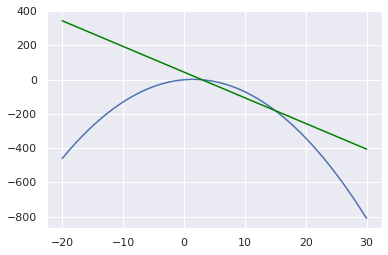

In [ ]:
import seaborn
seaborn.set(style='darkgrid')

def draw_secant(x_values):
    # draw function
    x = np.linspace(-20,30,100)
    y = -1*(x**2) + x*3 - 1
    plt.plot(x,y)
    
    # hent x1 og x2
    x1 = x_values[0]
    x2 = x_values[1]
    
    # udregn y-værdier fra x1 og x2
    y1 = -1*(x1**2) + x1*3 - 1
    y2 = -1*(x2**2) + x2*3 - 1
    
    # hældning m og intercept udregnes her
    m = (y2-y1)/(x2-x1)
    b = y1-m*x1
    
    # formel for sekanten
    s = m*x+b
    
    plt.plot(x,s, c='green')
    #plt.show()
    
draw_secant([3,15])

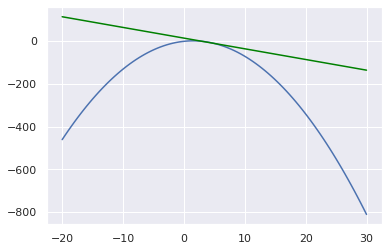

In [ ]:
draw_secant([3,5])

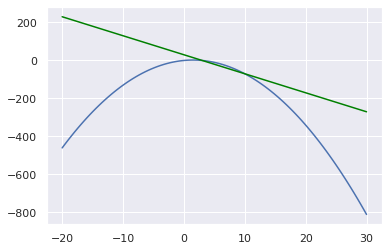

In [ ]:
draw_secant([3,10])

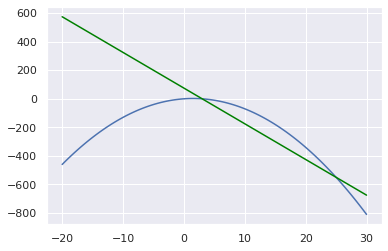

In [ ]:
draw_secant([3,25])

In [ ]:
iframe = '<iframe src="https://www.desmos.com/calculator/i4s0yotljp" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)


#### Del 1.7
I det delafsnit plottede vi sekantlinjer mellem den faste $x_1$ værdi og stadig større $x_2$ værdier. Da afstanden mellem $x_1$ og $x_2$ var lille, *krydsede* sekantlinjen nemt med vores kurve. Da vi øgede afstanden mellem de 2 x-værdier, begyndte sekantlinjen at afvige fra vores kurve. Denne observation er kritisk for at forstå hvordan hældning fungerer for kurver.

Hældningen på en kurve på et bestemt punkt forstås bedst som hældningen af sekantlinjen med stadig mindre intervaller af $[x_1, x_2]$. Jo mindre forskellen mellem $x_1$ og $x_2$, jo mere præcist tilnærmer sekantlinjen hældningen på det punkt på vores kurve.

Gå tilbage til den interaktive visualisering og hold $a$ ved 3 mens du ændrer $h$, som her er afstand mellem de to punkter  $[x_1, x_2]$.
Skift værdier mellem 2.5 til 3 og fra 3.5 til 3. Hvilken værdi nærmer hældningen sig? Hvad sker når $x_1$ og $x_2$ er de samme?


#### Del 1.8
Når $x_1$ og $x_2$ har samme værdi, er hældningsværdien **udefineret**. Dette skyldes, at **deling med 0** ingen mening har i matematiske beregninger.

$m = \frac{-1--1}{3-3} = \frac{0}{0} = \text{undefined}$

Når $x_2$ nærmer sig $x_1$ fra hvilken som helst side af kurven, er hældningen af den sekante linje imidlertid nær -3. Her er en tabel, der viser hældningsværdierne for stadig smalere huller mellem $x_1$ og $x_0$:


$$
\begin{matrix}
\hline
\textbf{x2} & \textbf{x1} & \textbf{m} \\ \hline
2.9         & 3           & -2.9       \\
2.99        & 3           & -2.99      \\
2.999       & 3           & -2.999     \\
3.01        & 3           & -3.01      \\
3.001       & 3           & -3.001     \\
3.0001      & 3           & -3.0001    \\ \hline
\end{matrix}
$$


Selvom vi ikke kan beregne hældningen på det punkt, hvor $x_0 = x_1 = 3$, kan vi udlede fra tabellen og grafen fra det sidste trin, at den nærmer sig -3. Denne værdi er kendt som **den øjeblikkelige vækstrate**, fordi den beskriver hældningen på et bestemt punkt. I lineære funktioner, er den øjeblikkelige vækstrate på ethvert punkt på linjen den samme. I
ikke-lineære funktioner, beskriver den øjeblikkelige ændringshastighed grafens stejlhed af funktionen på et bestemt punkt.

Denne linje er kendt som **tangenten**, og i modsætning til sekantlinjen skærer den kun vores funktion på ét tidspunkt. Indtil videre har vi arbejdet med sekantlinjer, der forbinder 2 punkter, der er tættere sammen. Du kan tænke på tangentlinjen som sekantlinjen når begge punkter er de samme. For nu bliver vi nødt til at lære at arbejde med den udefenerede værdi, som vi får når vi prøver at beregne tangentlinjen direkte.


**Øvelse** - fra https://tutorial.math.lamar.edu/Solutions/CalcI/Tangents_Rates/Prob1.aspx

$f\left( x \right) = 3{\left( {x + 2} \right)^2}$\
$P: x= -3$ 

$Q: -3.5; -3.1; -3.01; -3.001; -3.0001;
-2.5; -2.9; -2.99; -2.999; -2.9999$


In [ ]:
y1 = 3*(-3+2)**2

Q = np.array([-3.5, -3.1, -3.01, -3.001, -3.0001, -2.5, -2.9, -2.99, -2.999, -2.9999])

In [ ]:
Y = 3*(Q+2)**2

In [ ]:
Y

array([6.75      , 3.63      , 3.0603    , 3.006003  , 3.00060003,
       0.75      , 2.43      , 2.9403    , 2.994003  , 2.99940003])

In [ ]:
M = (Y-y1) / (Q--3)
print(M)

[-7.5    -6.3    -6.03   -6.003  -6.0003 -4.5    -5.7    -5.97   -5.997
 -5.9997]


#### Del 1.x - Opsummering



##### Syntaks:

* Generer et Numpy array med 100 værdier mellem 0 og 3: 

In [ ]:
import numpy as np
x = np.linspace(0, 3, 100)

* Plot $y = -(x^2) + 3x - 1$:

In [ ]:
y = -1 * (x ** 2) + 3*x - 1
plt.plot(x,y)

* Plot en sekantlinje:

In [ ]:
 x_0 = x_values[0]
 x_1 = x_values[1]
 y_0 = -1*(x_0**2) + x_0*3 - 1
 y_1 = -1*(x_1**2) + x_1*3 - 1
 m = (y_1 - y_0) / (x_1 - x_0)
 b = y_1 - m*x_1 
 y_secant = x*m + b
 plt.plot(x, y_secant, c='green')
 plt.show()

##### Hovedkoncepter:

* Calculus hjælper os med at:
  * Forstå stejlheden på forskellige punkter.
  * Finde de ekstreme punkter i en funktion.
  * Bestemme den optimale funktion, der bedst repræsenterer et datasæt.
* En lineær funktion er en lige linje.
* Hvis $m$ og $b$ er konstante værdier, hvor $x$ og $y$ er variabler, så er funktionen for en lineær funktion:

$y = mx + b$

* I en lineær funktion styrer $m$ værdien, hvor stejl en linje er, mens $b$ værdien styrer en linjes y-skæring, eller hvor linjen krydser $y$ aksen.

* En måde at tænke på hældning er som en ændringshastighed. Mere konkret, hældning er hvor meget y-aksen ændrer sig for en bestemt ændring i x-aksen. Hvis ($x_1, y_1$) og ($x_2, y_2$) er 2 koordinater på en linje er hældningsligningen:

$m = \frac{y_1 - y_2}{x_1 - x_2}$

* Når $x_1$ og $x_2$ er ækvivalente, er hældningen udefineret, fordi delingen af 0 ikke har nogen betydning i matematik.

* Ikke-lineære funktioner repræsenterer kurver, og deres outputværdier ($y$) er ikke proportionale med deres inputværdier ($x$).

* Eksempler på ikke-lineære funktioner inkluderer:
  * $y = x^3$
  * $y = x^3 + 3x^2 + 2x - 1$
  * $y = \frac{1}{-x^2}$
  * $y = \sqrt{x}$

* En linje, der skærer to punkter på en kurve, er kendt som en sekantlinie.

* Hældningen mellem to givne punkter er kendt som den øjeblikkelige ændringshastighed. For lineære funktioner, er ændringshastigheden den samme på ethvert punkt på linjen. For ikke-lineær funktion, beskriver øjeblikkelig ændringshastighed hældningen af linjen, der er vinkelret på den ikke-lineære
funktion på et bestemt punkt.

* Linjen, der er vinkelret på den ikke-lineære funktion på et bestemt punkt, er kendt som tangentlinien og skærer kun funktionen på ét tidspunkt.
